In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [153]:
data = pd.read_parquet("Data/DSB_BDK_trainingset.parquet")
togpunktlighed_daily = data.groupby('dato')['togpunktlighed'].mean()
togpunktlighed_daily = pd.DataFrame(togpunktlighed_daily).reset_index()

# "Random" hyperparameters

In [176]:
ratio = 0.9
train, test = togpunktlighed_daily[:int(togpunktlighed_daily.shape[0]*ratio)], togpunktlighed_daily[int(togpunktlighed_daily.shape[0]*ratio):]
sarima=SARIMAX(train['togpunktlighed'],order=(3,1,3),seasonal_order=(1,1,1,365))

In [177]:
fitted_model=sarima.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.25611D+00    |proj g|=  2.90488D+00

At iterate    5    f= -1.26641D+00    |proj g|=  2.70558D-01

At iterate   10    f= -1.27633D+00    |proj g|=  1.58960D+00

At iterate   15    f= -1.28039D+00    |proj g|=  4.54144D-01


In [160]:
fitted_model.predict()

0       0.000000
1       0.884321
2       0.876947
3       0.856013
4       0.841565
          ...   
2296    0.754845
2297    0.756897
2298    0.757663
2299    0.754442
2300    0.764958
Name: predicted_mean, Length: 2301, dtype: float64

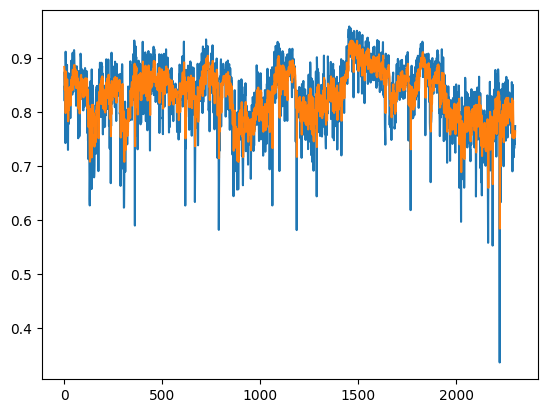

In [164]:
plt.plot(train['togpunktlighed'][1:])
plt.plot(fitted_model.predict()[1:])


In [172]:
fitted_model.predict(start = int(togpunktlighed_daily.shape[0]*ratio), end = togpunktlighed_daily.shape[0], dynamic=True)


2301    0.768693
2302    0.766549
2303    0.765807
2304    0.765452
2305    0.765409
          ...   
2553    0.765262
2554    0.765193
2555    0.765289
2556    0.765298
2557    0.765305
Name: predicted_mean, Length: 257, dtype: float64

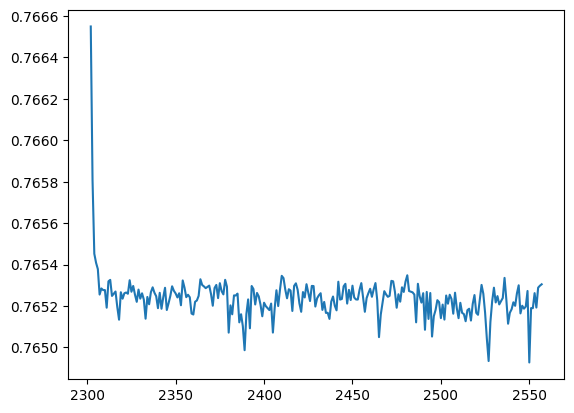

In [174]:
test_preds = fitted_model.predict(start = int(togpunktlighed_daily.shape[0]*ratio), end = togpunktlighed_daily.shape[0], dynamic=True)


#plt.plot(test['togpunktlighed'][1:])
plt.plot(test_preds[1:])

In [165]:
mean_squared_error(train['togpunktlighed'][1:],fitted_model.predict()[1:])

0.0018151200368363677

In [149]:
ratio = 0.9
train, test = togpunktlighed_daily[:int(togpunktlighed_daily.shape[0]*ratio)], togpunktlighed_daily[int(togpunktlighed_daily.shape[0]*ratio):]

SARIMA_model = auto_arima(train['togpunktlighed'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=365, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

Performing stepwise search to minimize aic


KeyboardInterrupt: 

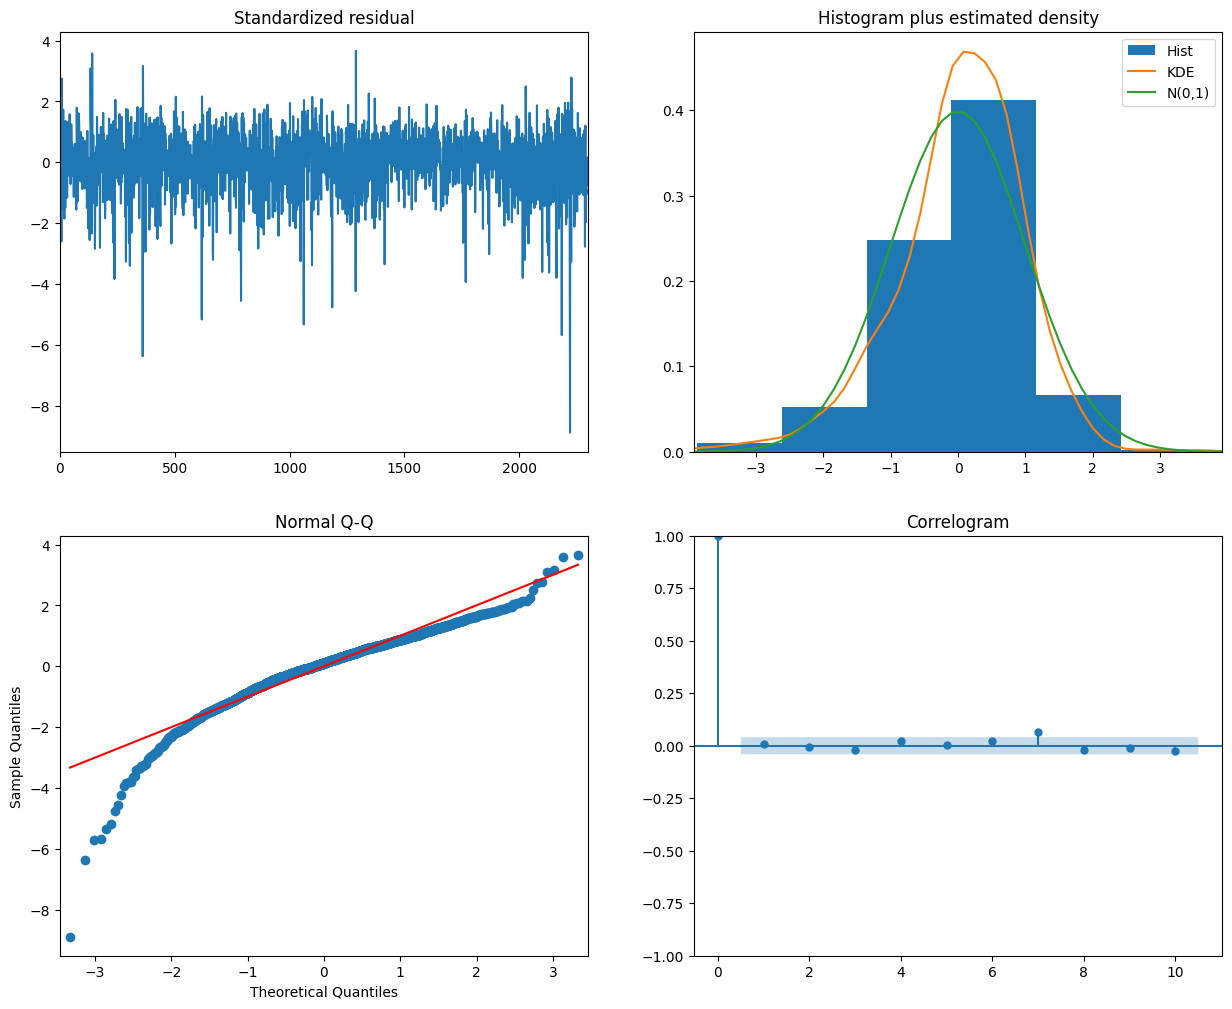

In [146]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

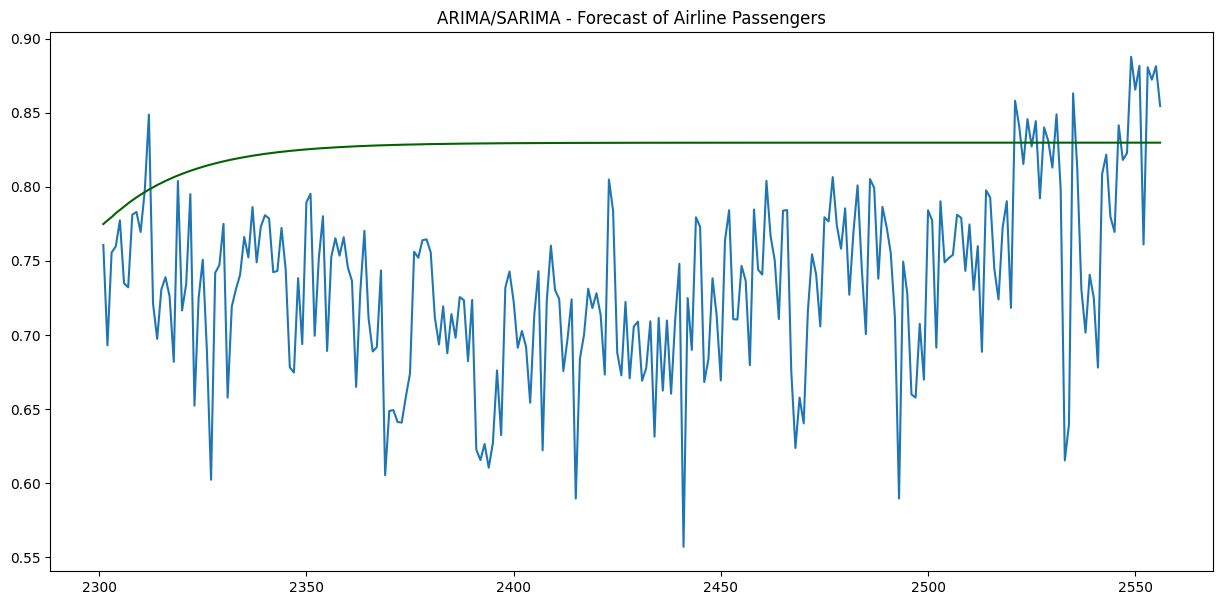

In [148]:
n_periods=test.shape[0]
fitted, confint = SARIMA_model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(togpunktlighed_daily['dato'].iloc[-1] + pd.DateOffset(days=1), periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(15,7))
plt.plot(togpunktlighed_daily['togpunktlighed'][-n_periods:], color='#1f76b4')
plt.plot(fitted, color='darkgreen')

plt.title("ARIMA/SARIMA - Forecast of Airline Passengers")
plt.show()

In [ ]:
ratio = 0.1
for strækning in data['visualiseringskode'].unique()[3:4]:
    strækning_data = data[data['visualiseringskode'] == strækning]
    togpunktlighed_strækning_daily = strækning_data.groupby('dato')['togpunktlighed'].mean()
    togpunktlighed_strækning_daily = pd.DataFrame(togpunktlighed_strækning_daily).reset_index()
    train, test = togpunktlighed_strækning_daily[:int(togpunktlighed_strækning_daily.shape[0]*ratio)], togpunktlighed_strækning_daily[int(togpunktlighed_strækning_daily.shape[0]*ratio):]
    

# Auto ARIMA

In [113]:
for strækning in data['visualiseringskode'].unique()[3:4]:
    strækning_data = data[data['visualiseringskode'] == strækning]
    togpunktlighed_strækning_daily = strækning_data.groupby('dato')['togpunktlighed'].mean()
    togpunktlighed_strækning_daily = pd.DataFrame(togpunktlighed_strækning_daily).reset_index()
    train, test = togpunktlighed_strækning_daily[:int(togpunktlighed_strækning_daily.shape[0]*0.1)], togpunktlighed_strækning_daily[int(togpunktlighed_strækning_daily.shape[0]*0.1):]
    m1 = auto_arima(y=train['togpunktlighed'], 
                          seasonal=True, 
                          stepwise=False, 
                          random=True, 
                          random_state=42, 
                          n_fits=5, 
                          n_jobs=-1, 
                          m=1, 
                          trace=True)
    m1.fit(train['togpunktlighed'])

 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=-642.073, Time=0.04 sec
 ARIMA(3,0,2)(0,0,0)[1] intercept   : AIC=-653.963, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=-613.645, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[1] intercept   : AIC=-655.125, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=-654.981, Time=0.17 sec

Best model:  ARIMA(3,0,0)(0,0,0)[1] intercept
Total fit time: 2.017 seconds


In [115]:
forecast = m1.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

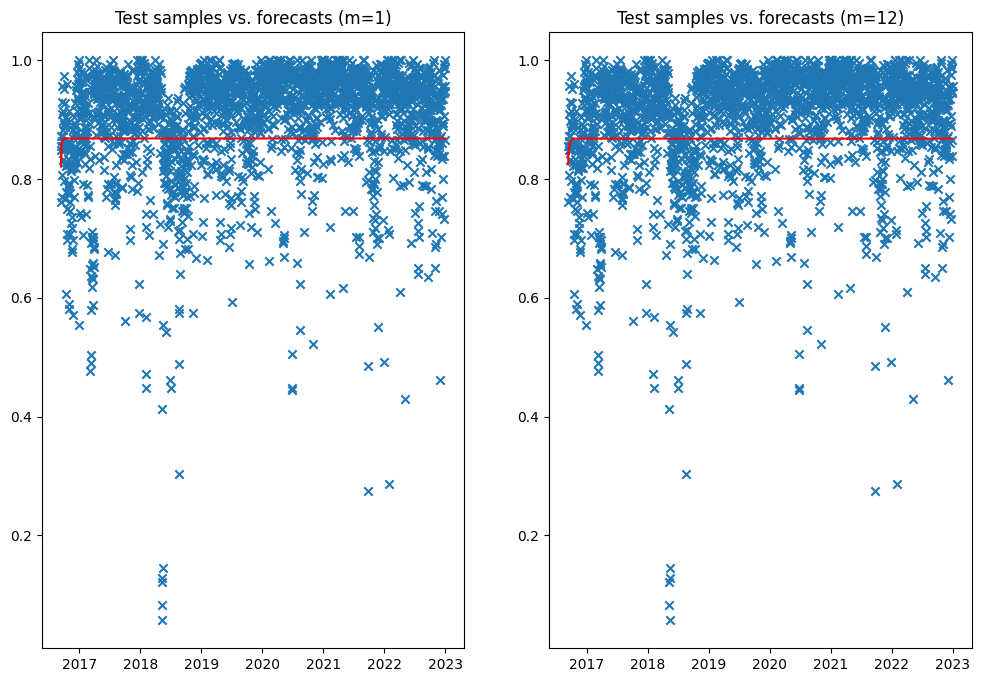

In [116]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 8))
x = np.arange(test.shape[0])

# Plot m=1
axes[0].scatter(test['dato'], test['togpunktlighed'], marker='x')
axes[0].plot(test['dato'], forecast, color='red')
axes[0].set_title('Test samples vs. forecasts (m=1)')

# Plot m=12
axes[1].scatter(test['dato'], test['togpunktlighed'], marker='x')
axes[1].plot(test['dato'], m12.predict(n_periods=test.shape[0]), color='red')
axes[1].set_title('Test samples vs. forecasts (m=12)')


plt.show()

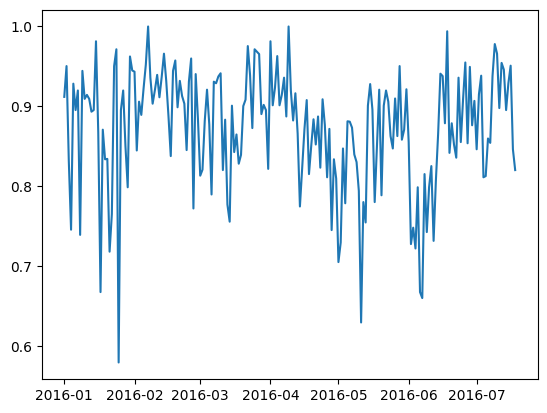

In [107]:
l = 200
plt.plot(togpunktlighed_strækning_daily['dato'][:l],togpunktlighed_strækning_daily['togpunktlighed'][:l])